# Scikit learn

tutorial homepage
https://scikit-learn.org/stable/tutorial/index.html

supervised learning page
https://scikit-learn.org/stable/supervised_learning.html



##### About SciKit learn

The essence of sciKit learn is to render useable information in the form of predictions from a complex data set. 

The data (or portions of) is taken in by an algorithm selected by the programmer. It is then processed according to the algorithms intrinsic qualitys and from that a prediction can be made as to the identity or value of other data points. This is only when the given inputs are of the same type of inputs used by the algorithm in generating its response to the input and test data.

SciKit learn is based on the python programming language.

###### supervised learning

This is when our data contains the information that we want to predict, the example of the Iris flower data set here is perfect, we have dimentions of the flower and we know already what type of flower they are. Given this information can our algorithm give a good estimate of a flower type when given a set of dimentions without the type. This type of problem is called a classification problem.

Within supervised learning we also have regression problems at its most simple this is prediction of a value based on the supply of a another value or values e.g can we predict the width of a tree trunk given the species and the height of a tree.

###### unsupervised learning

Unsupervised learning is when the data used to train the algorithm does not have a value or feature to train it to. The goal of this learning is to observe trends, clusters, or distibutions and present them as more intuatively understanadable data.

# How this jupyter notebook reads

The first part of the notebook introduces the data sets and performs the exploratory analysis of the data , the datasets are imported and using larely visual imagary the raw data set is explored before the data is cleaned up and exposed to the SKlearn packages.

### Section 
#### 1 Importing the packages
#### 2 The Data sets
    2.1 The Palmer penguins data set
    2.2 The Wine Chemistry data set
#### 3 Application of machine learning to the data sets

# Section 1 Importing the packages.

Here we import the packages used throughout the analysis and the aspects of the SKlearn packes used for the machine learning.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import sklearn.neighbors as nei
import sklearn.model_selection as mod
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

In [4]:
#Set the graph sizes
plt.rcParams['figure.figsize'] = (15,10)
plt.style.use('ggplot')

#  Section 2.The data sets

## Section 2.1 Importing and reviewing the Pengiuns data set.

![penguins](penguins.png)


Thanks to Alison Horst for the penguins image

The penguins in this data set from 3 islands can be male or female and the data was taken over 3 years 2007,2008,2009.

The measurements taken were bill length, bill depth, flipper length all measured in millimeters and weight in gramms. the sex of the penguins was also recorded.

In [5]:
from palmerpenguins import load_penguins

In [6]:
sns.set_style('whitegrid')
penguins = load_penguins()
# displaying the origional data set
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


###### Looking at the whole data set

Before we begin to clean up and dicect the data set we will take a look at a few plots that allow us to better visualise the data we have been given. We will start with a look at the body mass of the different types.

Text(0, 0.5, 'Body Mass (grams)')

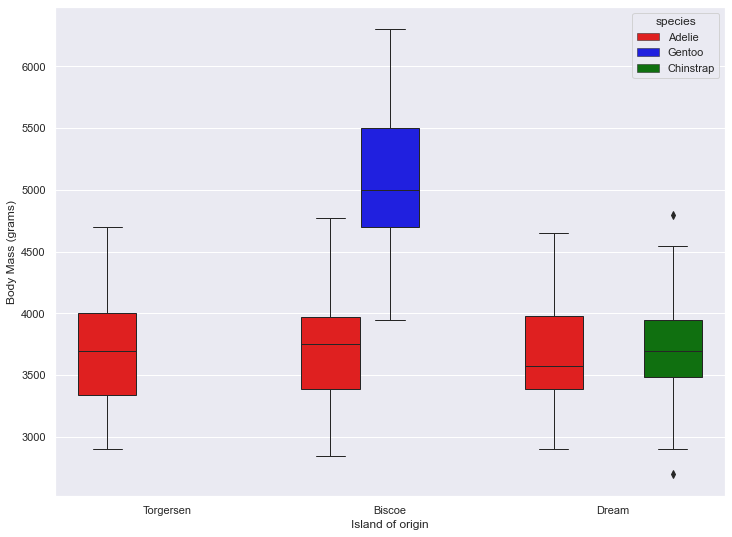

In [7]:
# setting up a box plot to display body mass, location and species
sns.set(rc={'figure.figsize':(12,9)})
g = sns.boxplot(x = 'island',
            y ='body_mass_g',
            hue = 'species',
            data = penguins,
            palette=['red','blue','green'],
            linewidth=1)
g.set_xlabel('Island of origin')
g.set_ylabel('Body Mass (grams)')

The first thing I can see is that the Adelie penguin is the only penguin to inhabit more than 1 island (at least when the data was aquired). The next thing is that the Adelie and the Chinstrap who inhabit Dream whilst they have different box plots they are far more similar on this visualisation than the Gentoo whose weight significantly differs from the Adelie of Biscoe island. there is some overlap on the tails but the main populations of these penguins differgreatly in weight.

Next we will look at the same plot but with respect to flipper length.

Text(0, 0.5, 'Flipper length (millimeters)')

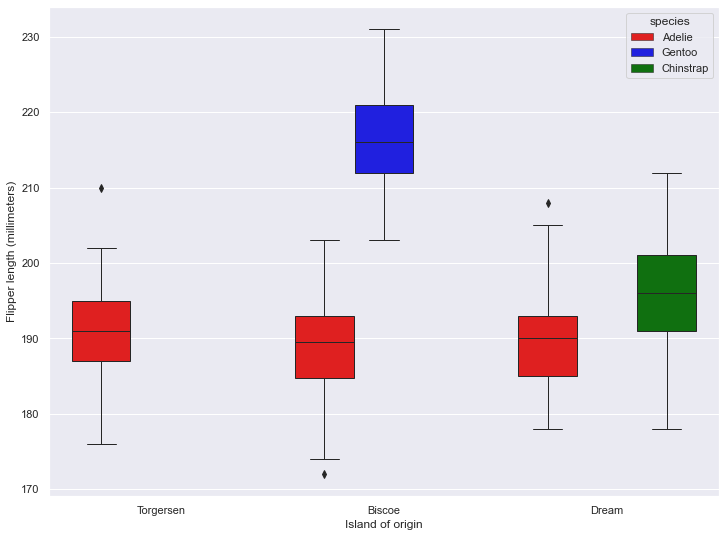

In [8]:
# setting up a box plot to display body mass, location and species
sns.set(rc={'figure.figsize':(12,9)})
g = sns.boxplot(x = 'island',
            y ='flipper_length_mm',
            hue = 'species',
            data = penguins,
            palette=['red','blue','green'],
            linewidth=1)
g.set_xlabel('Island of origin')
g.set_ylabel('Flipper length (millimeters)')

Here we have a much more stark differentiation between the species and to some degree a greater differentiation through the Adelie that inhabit different islands. This would add further weight to the idea that identification using the classification method would be suitable for this data set.

Next we will look at bill length and bill depth.

Text(0, 0.5, 'Bill length (millimeters)')

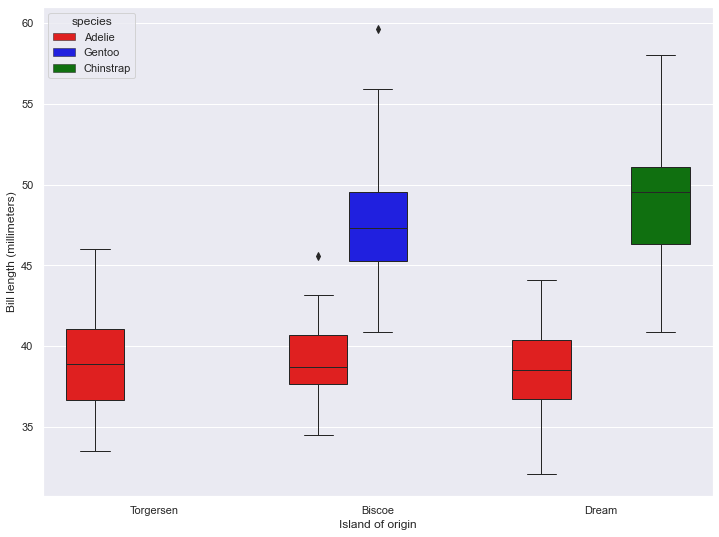

In [9]:
sns.set(rc={'figure.figsize':(12,9)})
g = sns.boxplot(x = 'island',
            y ='bill_length_mm',
            hue = 'species',
            data = penguins,
            palette=['red','blue','green'],
            linewidth=1)
g.set_xlabel('Island of origin')
g.set_ylabel('Bill length (millimeters)')

Text(0, 0.5, 'Bill depth (millimeters)')

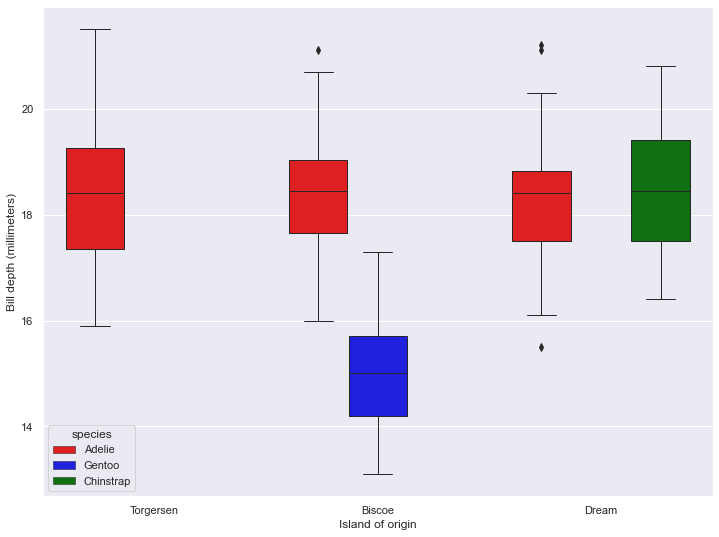

In [10]:
sns.set(rc={'figure.figsize':(12,9)})
g = sns.boxplot(x = 'island',
            y ='bill_depth_mm',
            hue = 'species',
            data = penguins,
            palette=['red','blue','green'],
            linewidth=1)
g.set_xlabel('Island of origin')
g.set_ylabel('Bill depth (millimeters)')

Both bill length and bill depth offer differentiation oportunity again.With Bill length clearly separating the Adelie from the other two and Bill depth separating the Gentoo. The difficulty for this algorithm may we be the determination of origin of the Adelie.

We will take a look at the pair plots for the species before diving into the issue between the Adelie penguin Island origin.

In [11]:
penguins2= penguins[['species','bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]

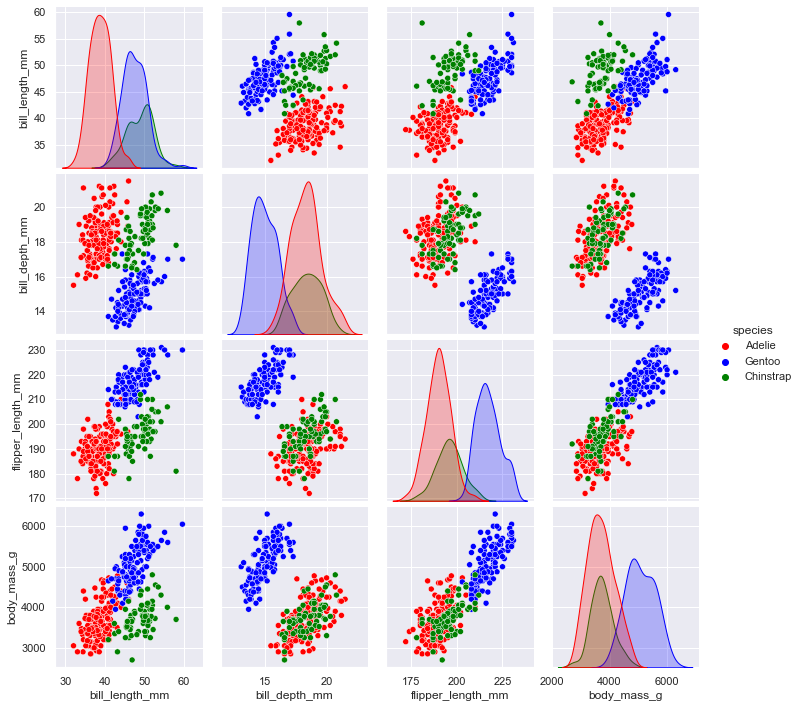

In [12]:
g = sns.pairplot(hue="species",
               data=penguins2,
               palette=['red','blue','green'])

The pair plots above show good grouping of the species as we suspected from the box plots. On some plots the Gentoo(Blue) flipper length/bill_depth, body_mass/bill_depth show a clear differentiation. 

Whilst the Adelie and Chinstrap occupy crossover on more attibutes bill_length still provides a high level of clearance between those two species with bill_length/body_mass and bill_length/bill_depth offering almost a complete separation. As such the application of suitable machine learning package would yield a high degree of success in predicting the correct species using the physical measurements of the penguins only.

###### We will now isolate the Adelie penguin and look at it in more detail.

In [13]:
singlepenguin =penguins.loc[penguins.loc[:,'species']== 'Adelie']
singlepenguin1 = singlepenguin[['island','bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
singlepenguin1

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Torgersen,39.1,18.7,181.0,3750.0
1,Torgersen,39.5,17.4,186.0,3800.0
2,Torgersen,40.3,18.0,195.0,3250.0
3,Torgersen,NaN,NaN,NaN,NaN
4,Torgersen,36.7,19.3,193.0,3450.0
...,...,...,...,...,...
147,Dream,36.6,18.4,184.0,3475.0
148,Dream,36.0,17.8,195.0,3450.0
149,Dream,37.8,18.1,193.0,3750.0
150,Dream,36.0,17.1,187.0,3700.0


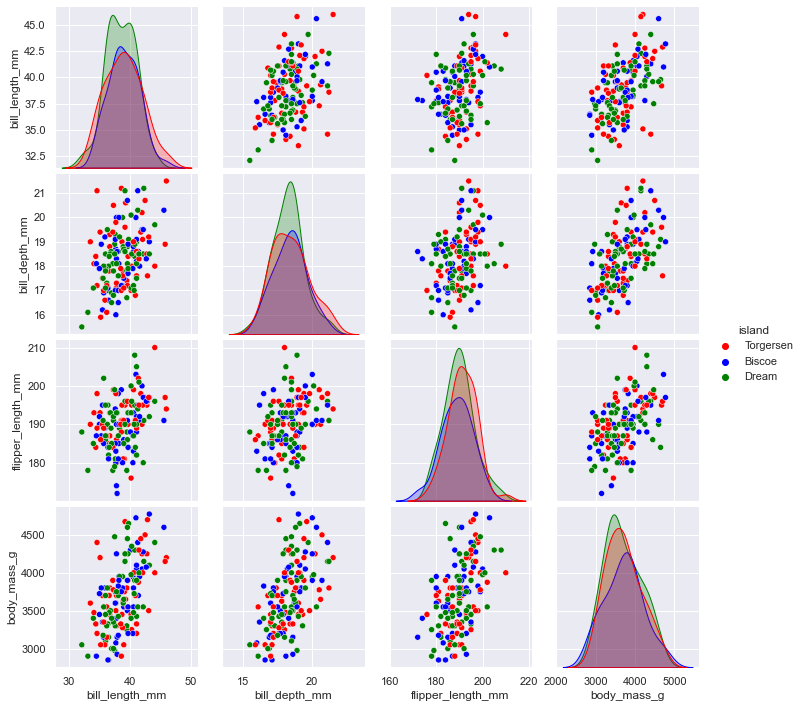

In [14]:
g = sns.pairplot(hue="island",
               data=singlepenguin1,
               palette=['red','blue','green'])

The pair plots for the differnt islands present us a better image to describe what we already knew and that was that the distribtion of the physical characteristics (excluding sex) for the Adelie penguin is in two dimetions not clearly differatiating between islands. It is possible now to dscout linear regression from our potential sources of machine learning. This type of scattered data would yeild very little for a predictive model to gain certainty from.

Just to visually demonstrate this I plotted a performed an lm plot of flipper length against body mass (below) clearly this data is not suitable for linear modeling within the (Adelie) penguin type.

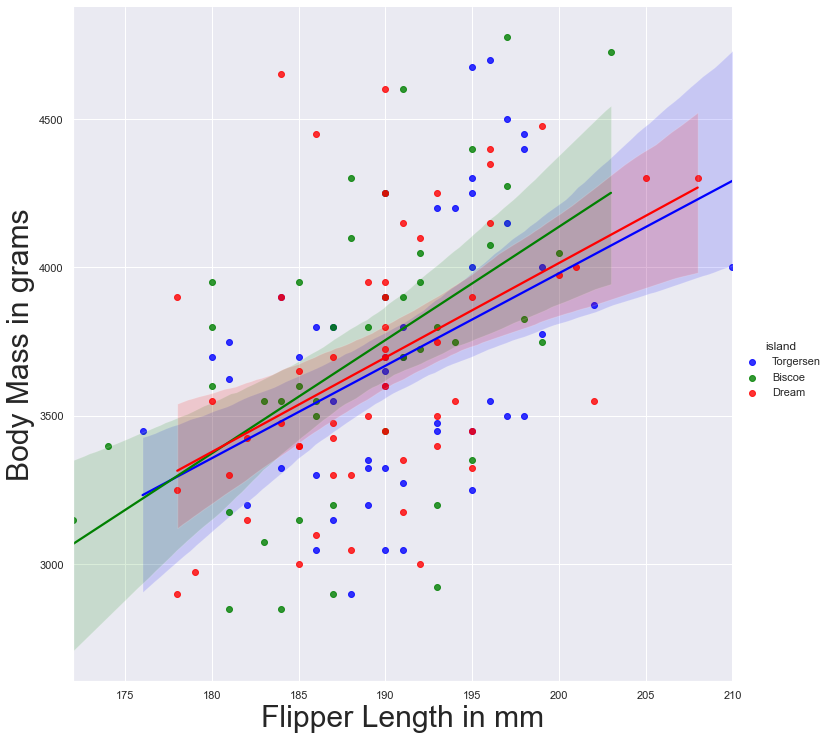

In [15]:
g = sns.lmplot(x="flipper_length_mm",
               y="body_mass_g",
               hue="island",
               height=10,
               data=singlepenguin1,
               palette=['blue','green','red'])
g.set_xlabels('Flipper Length in mm', fontsize = 30)
g.set_ylabels('Body Mass in grams', fontsize = 30)


We will try the k nearest neighbors algorithm and asses it's capability.


## 2.1 The wine Data set

The wine data below comes from the UC Irvine Machine Learning Repository. The wines come from three different wine varietals grown in the same part of Italy. The columns are as such.

###### 1. Wine varietal
    This is given a value of 1 , 2 or 3 and indicates which of the varitals the accompanying data beloings to.
###### 2. Alcohol content (%)
    This is the measured content of alcohol in the final wine
###### 3. Malic acid content
    Is linked to the ripeness of the grape, the less malic acid there is the more the ripe the grape is given. 
###### 4. Ash
        This is measured in grams / litre. It is a measure of inorganic material such as potassium, sodum, magnesium, iron, copper.   
###### 5. Alkalinity of Ash
    This is a second element in the assesment of the mineral content of the wine
###### 6. Magnesium
    This is a direct measure of the amount of mannesium found in the wine, magnesium is often assotiated with mouthfeel in drinks. It is a key constituant in the metabolism of yeast.
###### 7. Total Phenols
    Another key constituant in mouthfeel of wine it also contributes to the colour in red wine. This is a number of chemical compounds grouped together and are linked by a simlar chemical trait, that of the phenolic ring.
###### 8. Non flavanoid phenols
    This is a subgroup of the phenols, they contribute to antimicrobial activity in the wine and are characterised chemically by containing only 1 phenolic ring as opposed to 2 or more in the case of flavenoids
###### 9. Proanthocyanins
    Contribute to the astringency in wine (mouthfeel)
###### 10. Colour intesnsity
    This is a measure of the colour of wine
###### 11. Hue
    This is another measure of the colour instensity of wine
###### 12. OD280/OD315 of diluted wines
    This is a method for determining the protien concentration.
###### 13. Proline
    This is a measure of amino acid in wine.

###### Web sites used to obtain the information

https://www.randoxfood.com/why-is-testing-for-l-malic-acid-important-in-winemaking/

http://www.wineeducation.com/wineismadeof.html

https://currentprotocols.onlinelibrary.wiley.com/doi/abs/10.1002/0471142913.fai0101s06

https://en.wikipedia.org/wiki/Phenolic_content_in_wine

https://en.wikipedia.org/wiki/Flavonoid



In [16]:
wine = pd.read_csv("wine.csv")

In [17]:
wine.head()

,Wine,Alcohol,Malic acid,Ash,Alkalinity of ash,Magnesium,Total phenols,Flavenoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [18]:
wine.describe()

,Wine,Alcohol,Malic acid,Ash,Alkalinity of ash,Magnesium,Total phenols,Flavenoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [19]:
wine_colour = wine[["Wine","Color intensity","Hue","OD280/OD315 of diluted wines"]]
wine_colour

,Wine,Color intensity,Hue,OD280/OD315 of diluted wines
0,1,5.64,1.04,3.92
1,1,4.38,1.05,3.40
2,1,5.68,1.03,3.17
3,1,7.80,0.86,3.45
4,1,4.32,1.04,2.93
...,...,...,...,...
173,3,7.70,0.64,1.74
174,3,7.30,0.70,1.56
175,3,10.20,0.59,1.56
176,3,9.30,0.60,1.62


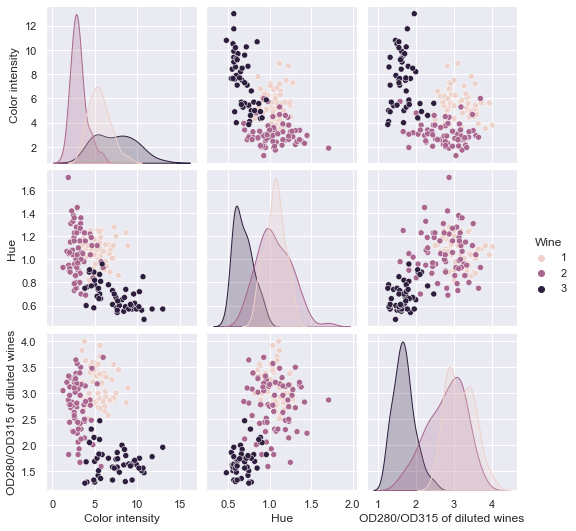

In [20]:
sns.pairplot(wine_colour, hue="Wine")

In [21]:
wine_Ochemistry = wine[["Wine","Malic acid","Total phenols","Flavenoids","Nonflavanoid phenols","Proanthocyanins","Proline"]]
wine_Ochemistry

,Wine,Malic acid,Total phenols,Flavenoids,Nonflavanoid phenols,Proanthocyanins,Proline
0,1,1.71,2.80,3.06,0.28,2.29,1065
1,1,1.78,2.65,2.76,0.26,1.28,1050
2,1,2.36,2.80,3.24,0.30,2.81,1185
3,1,1.95,3.85,3.49,0.24,2.18,1480
4,1,2.59,2.80,2.69,0.39,1.82,735
...,...,...,...,...,...,...,...
173,3,5.65,1.68,0.61,0.52,1.06,740
174,3,3.91,1.80,0.75,0.43,1.41,750
175,3,4.28,1.59,0.69,0.43,1.35,835
176,3,2.59,1.65,0.68,0.53,1.46,840


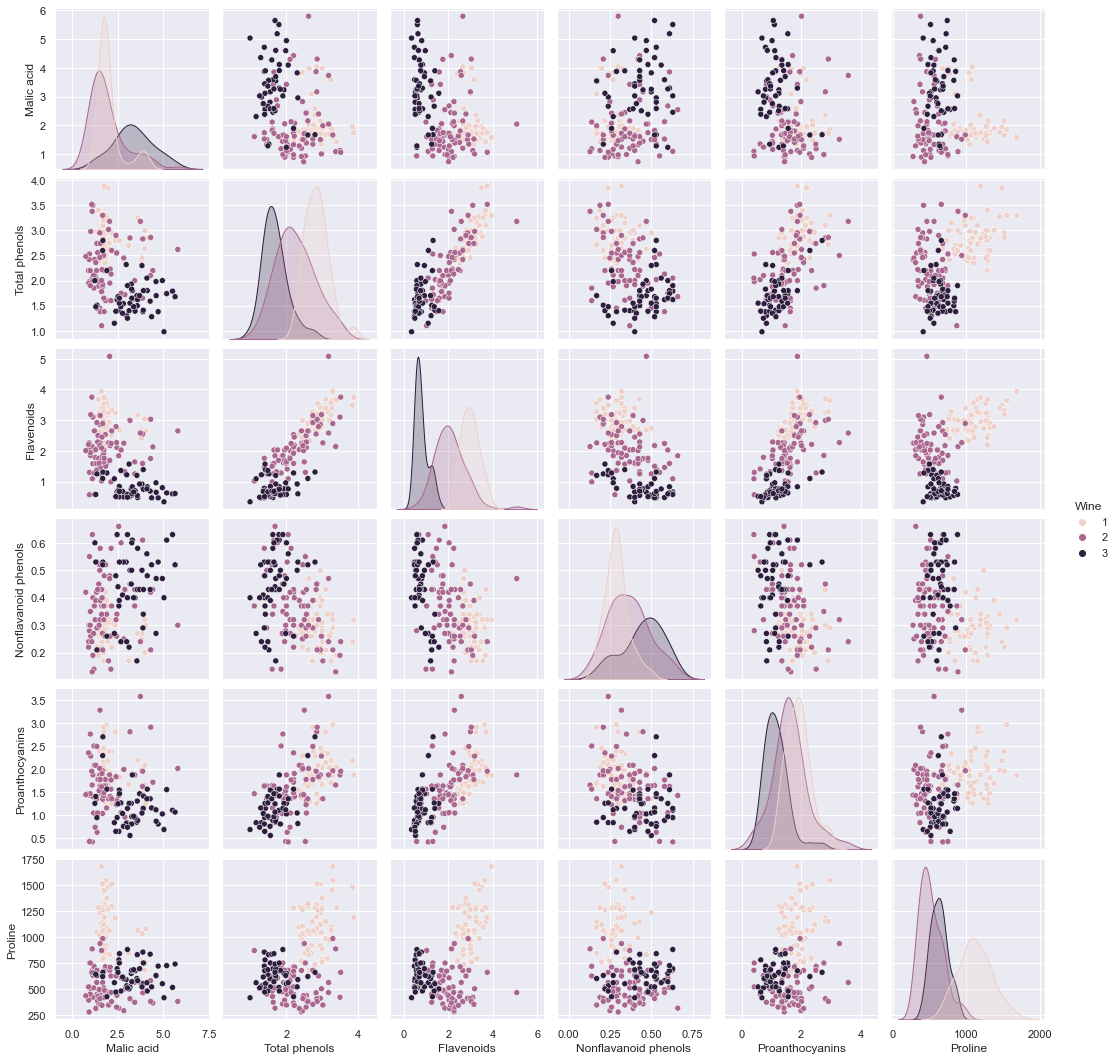

In [22]:
sns.pairplot(wine_Ochemistry, hue="Wine")

In [23]:
wine_Inchemistry = wine[["Wine","Ash","Alkalinity of ash","Magnesium"]]
wine_Inchemistry

,Wine,Ash,Alkalinity of ash,Magnesium
0,1,2.43,15.6,127
1,1,2.14,11.2,100
2,1,2.67,18.6,101
3,1,2.50,16.8,113
4,1,2.87,21.0,118
...,...,...,...,...
173,3,2.45,20.5,95
174,3,2.48,23.0,102
175,3,2.26,20.0,120
176,3,2.37,20.0,120


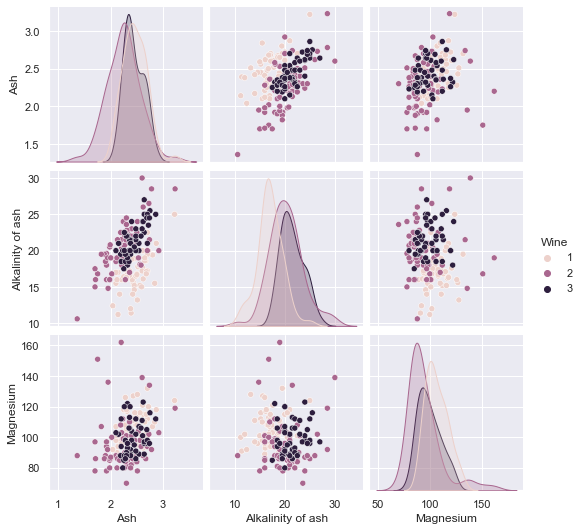

In [24]:
sns.pairplot(wine_Inchemistry, hue="Wine")

In [25]:
Wine_alc = wine[["Wine", "Alcohol"]]
Wine_alc

,Wine,Alcohol
0,1,14.23
1,1,13.20
2,1,13.16
3,1,14.37
4,1,13.24
...,...,...
173,3,13.71
174,3,13.40
175,3,13.27
176,3,13.17


### Splitting the wine into respective wine type

He we split the wine into groups based on the 'Wine' number of 1,2 or 3.

In [26]:
vin1 =wine[wine["Wine"] == 1]
vin2 =wine[wine["Wine"] == 2]
vin3 =wine[wine["Wine"] == 3]


###### We then obtain some desriptive stats for each wine type

In [27]:
v1 = vin1.describe()
v1

,Wine,Alcohol,Malic acid,Ash,Alkalinity of ash,Magnesium,Total phenols,Flavenoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,59.0,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,1.0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
std,0.0,0.462125,0.688549,0.227166,2.546322,10.498949,0.338961,0.397494,0.070049,0.412109,1.238573,0.116483,0.357077,221.520767
min,1.0,12.850000,1.350000,2.040000,11.200000,89.000000,2.200000,2.190000,0.170000,1.250000,3.520000,0.820000,2.510000,680.000000
25%,1.0,13.400000,1.665000,2.295000,16.000000,98.000000,2.600000,2.680000,0.255000,1.640000,4.550000,0.995000,2.870000,987.500000
50%,1.0,13.750000,1.770000,2.440000,16.800000,104.000000,2.800000,2.980000,0.290000,1.870000,5.400000,1.070000,3.170000,1095.000000
75%,1.0,14.100000,1.935000,2.615000,18.700000,114.000000,3.000000,3.245000,0.320000,2.090000,6.225000,1.130000,3.420000,1280.000000
max,1.0,14.830000,4.040000,3.220000,25.000000,132.000000,3.880000,3.930000,0.500000,2.960000,8.900000,1.280000,4.000000,1680.000000


In [28]:
v2 = vin2.describe()
v2

,Wine,Alcohol,Malic acid,Ash,Alkalinity of ash,Magnesium,Total phenols,Flavenoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,71.0,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,2.0,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
std,0.0,0.537964,1.015569,0.315467,3.349770,16.753497,0.545361,0.705701,0.123961,0.602068,0.924929,0.202937,0.496573,157.211220
min,2.0,11.030000,0.740000,1.360000,10.600000,70.000000,1.100000,0.570000,0.130000,0.410000,1.280000,0.690000,1.590000,278.000000
25%,2.0,11.915000,1.270000,2.000000,18.000000,85.500000,1.895000,1.605000,0.270000,1.350000,2.535000,0.925000,2.440000,406.500000
50%,2.0,12.290000,1.610000,2.240000,20.000000,88.000000,2.200000,2.030000,0.370000,1.610000,2.900000,1.040000,2.830000,495.000000
75%,2.0,12.515000,2.145000,2.420000,22.000000,99.500000,2.560000,2.475000,0.430000,1.885000,3.400000,1.205000,3.160000,625.000000
max,2.0,13.860000,5.800000,3.230000,30.000000,162.000000,3.520000,5.080000,0.660000,3.580000,6.000000,1.710000,3.690000,985.000000


In [29]:
v3 = vin3.describe()
v3

,Wine,Alcohol,Malic acid,Ash,Alkalinity of ash,Magnesium,Total phenols,Flavenoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,48.0,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.00000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,3.0,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.44750,1.153542,7.396250,0.682708,1.683542,629.895833
std,0.0,0.530241,1.087906,0.184690,2.258161,10.890473,0.356971,0.293504,0.12414,0.408836,2.310942,0.114441,0.272111,115.097043
min,3.0,12.200000,1.240000,2.100000,17.500000,80.000000,0.980000,0.340000,0.17000,0.550000,3.850000,0.480000,1.270000,415.000000
25%,3.0,12.805000,2.587500,2.300000,20.000000,89.750000,1.407500,0.580000,0.39750,0.855000,5.437500,0.587500,1.510000,545.000000
50%,3.0,13.165000,3.265000,2.380000,21.000000,97.000000,1.635000,0.685000,0.47000,1.105000,7.550000,0.665000,1.660000,627.500000
75%,3.0,13.505000,3.957500,2.602500,23.000000,106.000000,1.807500,0.920000,0.53000,1.350000,9.225000,0.752500,1.820000,695.000000
max,3.0,14.340000,5.650000,2.860000,27.000000,123.000000,2.800000,1.570000,0.63000,2.700000,13.000000,0.960000,2.470000,880.000000


###### We then subtract one wine type from the other this will give us an indication of how the values desriptive stats vary from each other for each wine, this give us an insight into the differences in the wine types

The most interesting values here are the basic mean values

In [30]:
x = vin1.mean()
a = vin1.std()

In [31]:
y = vin2.mean()
b = vin2.std()

In [32]:
z = vin3.mean()
c= vin3.std()

In [33]:
dif12 =pd.DataFrame(data=x-y)
dif13 =pd.DataFrame(data=x-z)
dif23 =pd.DataFrame(data=y-z)

In [34]:
Wine_No1= abs(x)
Wine_No2= abs(y)
Wine_No3= abs(z)
diff_12 = abs(x-y)
diff_13 = abs(x-z)
diff_23 = abs(y-z)
std1 =a
std2 =b
std3 =c
name = ['Wine','Alcohol','Malic acid','Ash','Alkalinity of ash','Magnesium','Total phenols','Flavenoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
d = {'Mean Wine1':Wine_No1,'std dev 1': std1, 'Mean Wine2': Wine_No2 ,'std dev 2': std2,'Mean Wine3': Wine_No3,'std dev 3': std3, 'Diff 1v2': diff_12 , 'Diff 1v3' :diff_13, 'Diff 2v3': diff_23}
df = pd.DataFrame(d)
df.style.format({'Mean Wine1': '{:,.2f}'.format,'std dev 1': '{:,.2f}'.format,'Mean Wine2':'{:,.2f}'.format,'std dev 2': '{:,.2f}'.format,'Mean Wine3':'{:,.2f}'.format,'std dev 3': '{:,.2f}'.format,'Diff 1v2':'{:,.2f}'.format,'Diff 1v3':'{:,.2f}'.format, 'Diff 2v3':'{:,.2f}'.format})

,Mean Wine1,std dev 1,Mean Wine2,std dev 2,Mean Wine3,std dev 3,Diff 1v2,Diff 1v3,Diff 2v3
Wine,1.00,0.00,2.00,0.00,3.00,0.00,1.00,2.00,1.00
Alcohol,13.74,0.46,12.28,0.54,13.15,0.53,1.47,0.59,0.88
Malic acid,2.01,0.69,1.93,1.02,3.33,1.09,0.08,1.32,1.40
Ash,2.46,0.23,2.24,0.32,2.44,0.18,0.21,0.02,0.19
Alkalinity of ash,17.04,2.55,20.24,3.35,21.42,2.26,3.20,4.38,1.18
Magnesium,106.34,10.50,94.55,16.75,99.31,10.89,11.79,7.03,4.76
Total phenols,2.84,0.34,2.26,0.55,1.68,0.36,0.58,1.16,0.58
Flavenoids,2.98,0.40,2.08,0.71,0.78,0.29,0.90,2.20,1.30
Nonflavanoid phenols,0.29,0.07,0.36,0.12,0.45,0.12,0.07,0.16,0.08
Proanthocyanins,1.90,0.41,1.63,0.60,1.15,0.41,0.27,0.75,0.48


###### Viewing the table above we can use it to pick out some attributes that appear to provide a clear difference between the three varietals. The First one is Hue which Wine 1 and 2 have the same mean value 1.06 (to 2d.p) but Wine 3 has a mean value of 0.68 (to 2 d.p). This coupled with a standard deviation that will keep most of the (Wine 3) population apart from the other 2 mean values.

###### We will couple this with Proline, this one has a much different mean value for Wine 1 with wine 2 and 3 much cliser for the mean value of this attribute.


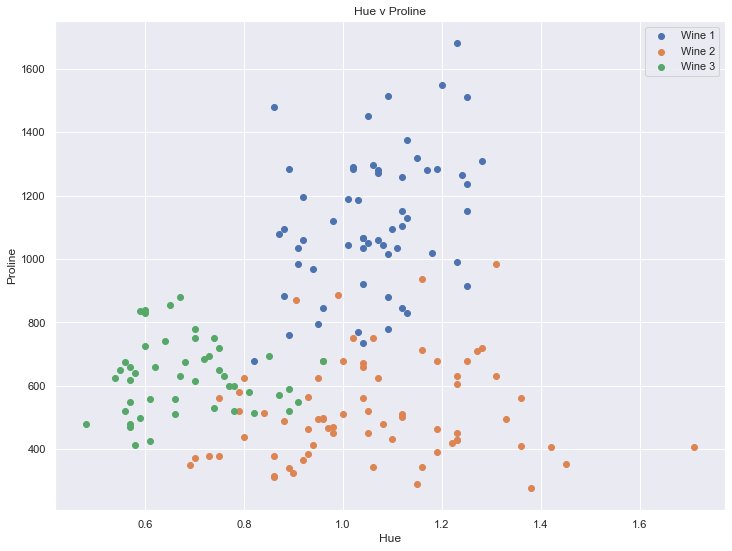

In [35]:
fig,ax = plt.subplots()
ax.scatter(vin1['Hue'],vin1['Proline'], label="Wine 1")
ax.scatter(vin2['Hue'],vin2['Proline'], label="Wine 2")
ax.scatter(vin3['Hue'],vin3['Proline'], label="Wine 3")
ax.set_xlabel('Hue')
ax.set_ylabel('Proline')
plt.title("Hue v Proline")
ax.legend();

###### The inamge above show a good separation for the different wines given that we have only exploited 2 of the 13 values available to obtain this separation.

###### Now selecting 2 other values that demonstate clear sepation in our data comparison table these values are Flvenoids and Colour instensity.

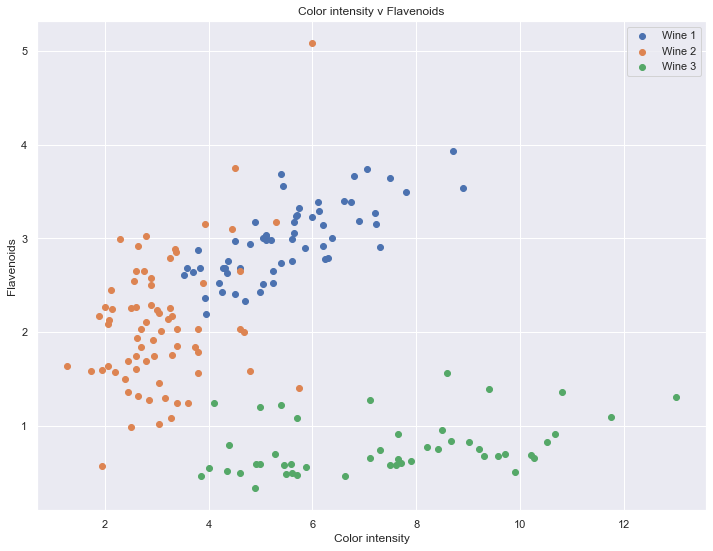

In [36]:
fig,ax = plt.subplots()
ax.scatter(vin1['Color intensity'],vin1['Flavenoids'], label="Wine 1")
ax.scatter(vin2['Color intensity'],vin2['Flavenoids'], label="Wine 2")
ax.scatter(vin3['Color intensity'],vin3['Flavenoids'], label="Wine 3")
ax.set_xlabel('Color intensity')
ax.set_ylabel('Flavenoids')
plt.title("Color intensity v Flavenoids")
ax.legend();

######  This gives a great separation of wine 3 with only a couple wines sitting close to wine 2. It appears that with only looking at 4 attributes we can see that characterisitics of the wine can provide a high degree of separation

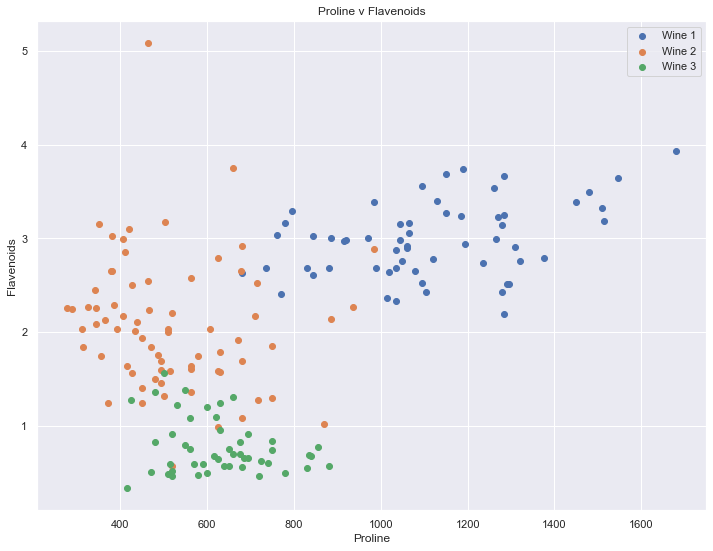

In [37]:
fig,ax = plt.subplots()
ax.scatter(vin1['Proline'],vin1['Flavenoids'], label="Wine 1")
ax.scatter(vin2['Proline'],vin2['Flavenoids'], label="Wine 2")
ax.scatter(vin3['Proline'],vin3['Flavenoids'], label="Wine 3")
ax.set_xlabel('Proline')
ax.set_ylabel('Flavenoids')
plt.title("Proline v Flavenoids")
ax.legend();

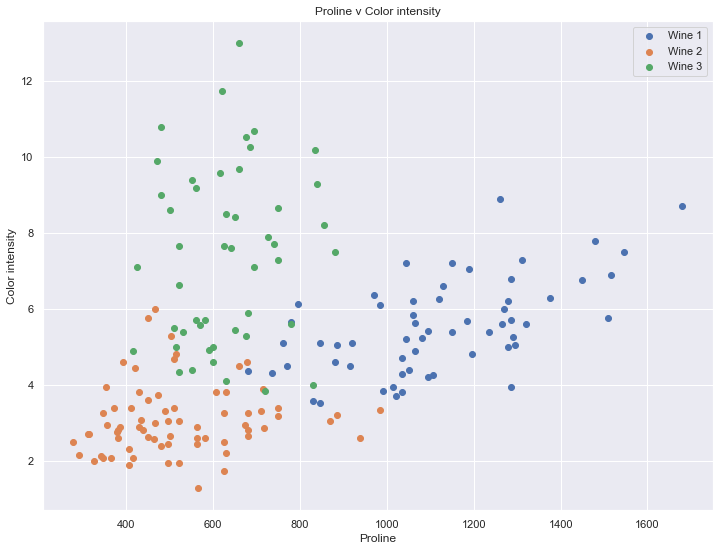

In [38]:
fig,ax = plt.subplots()
ax.scatter(vin1['Proline'],vin1['Color intensity'], label="Wine 1")
ax.scatter(vin2['Proline'],vin2['Color intensity'], label="Wine 2")
ax.scatter(vin3['Proline'],vin3['Color intensity'], label="Wine 3")
ax.set_xlabel('Proline')
ax.set_ylabel('Color intensity')
plt.title("Proline v Color intensity")
ax.legend();

# Using the K nearest neighbors algorithm on the data sets

#### K nearest neigbours

The name itself is explanatory. The Nearest neighbors method plots out the data, the classification is generated by looking at "who are the nearest neighbors" at the point of query.

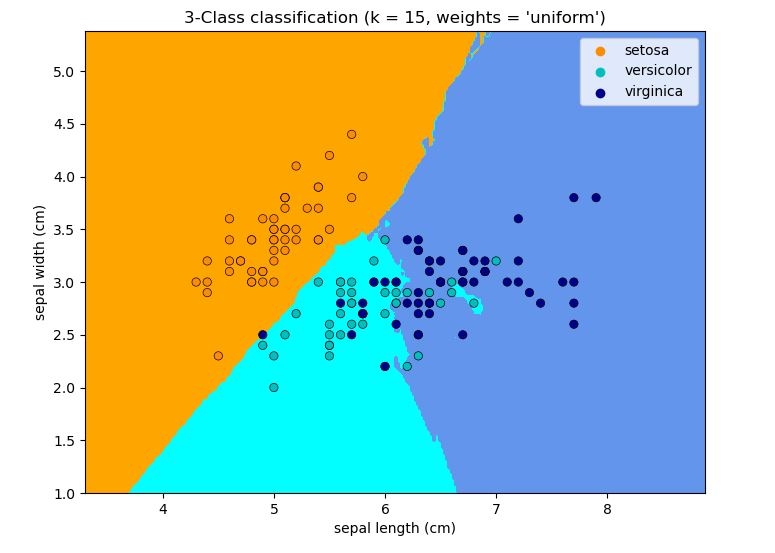

The image above shows the distribution of the flower types in the classic Iris flowers data set. Nearest neighbor gets it answer by simply taking the input data (the query) and placing it on the map its created it then 'looks' to see which are the nearest neighbours. This number of neighbours can be set by the user to decide how far out in terms of other entitys the user wants to reach in order to gain the classification.

Nearest neighbours also has a distance weighted option which applies a factor to each of the (number) of neigbours identified depending on it's dstance from the query point hence a very close neighbour of the query point would carry more weight in the overall classification than the (for example) 5th nearest neighbor.

A example of weighting is given in the wine interogation 6 and 6a.

### Penguin data set

In [39]:
# creation of KNN neighbours field for prediciton

In [40]:
# removing the incomplete data

In [41]:
penguins2 =penguins.dropna()

In [42]:
penguins2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [43]:
inputs = penguins2[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
output = penguins2[['species','island','sex']]

In [44]:
inputs

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
339,55.8,19.8,207.0,4000.0
340,43.5,18.1,202.0,3400.0
341,49.6,18.2,193.0,3775.0
342,50.8,19.0,210.0,4100.0


In [45]:
output.head()

,species,island,sex
0,Adelie,Torgersen,male
1,Adelie,Torgersen,female
2,Adelie,Torgersen,female
4,Adelie,Torgersen,female
5,Adelie,Torgersen,male


In [46]:
# using 5 for the comparison number
knn =nei.KNeighborsClassifier(n_neighbors=5)

In [47]:
# calling the knn fit
knn.fit(inputs, output)

KNeighborsClassifier()

In [48]:
# retrieving penguin 300 for comparison
penguins2.loc[13]

species                 Adelie
island               Torgersen
bill_length_mm            38.6
bill_depth_mm             21.2
flipper_length_mm        191.0
body_mass_g             3800.0
sex                       male
year                      2007
Name: 13, dtype: object

In [49]:
knn.predict([[38.6,21.2,191.0,3800.0]])

array([['Adelie', 'Biscoe', 'male']], dtype=object)

###### Here we will use the k nearest neighbour and asses it's capabiltys using the knn test score. The test score should be viewed as a measure of accuracy between 0-100.

###### Test 1. 

Using all the penguins numerical values to generate the model with the attempt being made to use these atttributes to predict the species.

In [50]:
train,test = mod.train_test_split(penguins2)

In [51]:
inputs, outputs = train[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']],train['species']

In [52]:
knn = nei.KNeighborsClassifier()

In [53]:
knn.fit(inputs,outputs)

KNeighborsClassifier()

In [54]:
knn.score(test[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']],test['species'])

0.8214285714285714

###### Test 2

Using the flipper length and body mass only

In [55]:
train,test = mod.train_test_split(penguins2)

In [56]:
inputs, outputs = train[['flipper_length_mm','body_mass_g']],train['species']

In [57]:
knn = nei.KNeighborsClassifier()

In [58]:
knn.fit(inputs,outputs)

KNeighborsClassifier()

In [59]:
knn.score(test[['flipper_length_mm','body_mass_g']],test['species'])

0.75

###### Test 3

Using bill length and body mass only.

In [60]:
train,test = mod.train_test_split(penguins2)

In [61]:
inputs, outputs = train[['bill_length_mm','body_mass_g']],train['species']

In [62]:
knn = nei.KNeighborsClassifier()

In [63]:
knn.fit(inputs,outputs)

KNeighborsClassifier()

In [64]:
knn.score(test[['bill_length_mm','body_mass_g']],test['species'])

0.7261904761904762

###### Test 4

Using bill depth and body mass only

In [65]:
train,test = mod.train_test_split(penguins2)

In [66]:
inputs, outputs = train[['bill_depth_mm','body_mass_g']],train['species']

In [67]:
knn = nei.KNeighborsClassifier()

In [68]:
knn.fit(inputs,outputs)

KNeighborsClassifier()

In [69]:
knn.score(test[['bill_depth_mm','body_mass_g']],test['species'])

0.6785714285714286

###### Test 6

using

In [347]:
train,test = mod.train_test_split(penguins2)

In [348]:
inputs, outputs = train[['bill_depth_mm','bill_length_mm']],train['species']

In [349]:
knn = nei.KNeighborsClassifier()

In [350]:
knn.fit(inputs,outputs)

KNeighborsClassifier()

In [351]:
knn.score(test[['bill_depth_mm','bill_length_mm']],test['species'])

0.9404761904761905

###### The final test provides us with a fantastic test result when we train the system with only bill depth and bill length the noise provided by weight and flipper length is removed and the nearest neighbours method provides an excellent correlation. This we can see from the pair plots in section 2 is where we have the greatest definition between species of penguin.

###### Test 7 

Will nearest neighbors work on the origin of the penguin?

In [352]:
train,test = mod.train_test_split(penguins2)

In [353]:
inputs, outputs = train[['bill_depth_mm','bill_length_mm']],train['island']

In [354]:
knn = nei.KNeighborsClassifier()

In [355]:
knn.fit(inputs,outputs)

KNeighborsClassifier()

In [356]:
knn.score(test[['bill_depth_mm','bill_length_mm']],test['island'])

0.7023809523809523

###### This looks like a good score but it is most likely that the bulk of the test score comes from the correct identification of the single island origin penguins that were well defined in the previous test (6) thus the identification of the island of orgin for the adele Penguin remains elusive.

### Wine data set

In [70]:
wine.head()

,Wine,Alcohol,Malic acid,Ash,Alkalinity of ash,Magnesium,Total phenols,Flavenoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [71]:
vinputs = wine[['Alcohol','Malic acid','Ash','Alkalinity of ash','Magnesium','Total phenols','Flavenoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']]
vinoutput = wine[['Wine']]

In [72]:
knn =nei.KNeighborsClassifier(n_neighbors=5)

In [73]:
knn.fit(vinputs,vinoutput)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [74]:
wine.loc[170]

Wine                              3.00
Alcohol                          12.20
Malic acid                        3.03
Ash                               2.32
Alkalinity of ash                19.00
Magnesium                        96.00
Total phenols                     1.25
Flavenoids                        0.49
Nonflavanoid phenols              0.40
Proanthocyanins                   0.73
Color intensity                   5.50
Hue                               0.66
OD280/OD315 of diluted wines      1.83
Proline                         510.00
Name: 170, dtype: float64

In [75]:
# wine 13
knn.predict([[14.75,1.73,2.39,11.40,91.00,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150.00]])
# correct

array([1], dtype=int64)

In [76]:
# wine 170
knn.predict([[12.20,3.03,2.32,19.00,96.00,1.25,0.49,0.40,0.73,5.50,0.66,1.83,510.00]])
# correct

array([3], dtype=int64)

###### wine testing

###### Test 1

All the attributes placed against the wine type.

In [357]:
train,test = mod.train_test_split(wine)

In [358]:
inputs, outputs = train[['Alcohol','Malic acid','Ash','Alkalinity of ash','Magnesium','Total phenols','Flavenoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']],train['Wine']

In [359]:
knn = nei.KNeighborsClassifier()

In [360]:
knn.fit(inputs,outputs)

KNeighborsClassifier()

In [361]:
knn.score(test[['Alcohol','Malic acid','Ash','Alkalinity of ash','Magnesium','Total phenols','Flavenoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']],test['Wine'])

0.7333333333333333

###### wine testing 2

In [362]:
train,test = mod.train_test_split(wine)

In [363]:
inputs, outputs = train[['Malic acid','Ash','Alkalinity of ash','Magnesium']],train['Wine']

In [364]:
knn = nei.KNeighborsClassifier()

In [365]:
knn.fit(inputs,outputs)

KNeighborsClassifier()

In [366]:
knn.score(test[['Malic acid','Ash','Alkalinity of ash','Magnesium']],test['Wine'])

0.6444444444444445

###### wine testing 3

In [367]:
train,test = mod.train_test_split(wine)

In [368]:
inputs, outputs = train[['Flavenoids','Color intensity']],train['Wine']

In [369]:
knn = nei.KNeighborsClassifier()

In [370]:
knn.fit(inputs,outputs)

KNeighborsClassifier()

In [371]:
knn.score(test[['Flavenoids','Color intensity']],test['Wine'])

0.9333333333333333

###### wine testing 4

In [372]:
train,test = mod.train_test_split(wine)

In [373]:
inputs, outputs = train[['Flavenoids','Proline']],train['Wine']

In [374]:
knn = nei.KNeighborsClassifier()

In [375]:
knn.fit(inputs,outputs)

KNeighborsClassifier()

In [376]:
knn.score(test[['Flavenoids','Proline']],test['Wine'])

0.7111111111111111

###### wine testing 5

In [377]:
train,test = mod.train_test_split(wine)

In [378]:
inputs, outputs = train[['Hue','Proline']],train['Wine']


In [379]:
knn = nei.KNeighborsClassifier()

In [380]:
knn.fit(inputs,outputs)

KNeighborsClassifier()

In [381]:
knn.score(test[['Hue','Proline']],test['Wine'])

0.6666666666666666

###### wine testing 6

In [382]:
train,test = mod.train_test_split(wine)

In [383]:
inputs, outputs = train[['Hue','Proline','Flavenoids','Color intensity']],train['Wine']

In [384]:
knn = nei.KNeighborsClassifier()

In [385]:
knn.fit(inputs,outputs)

KNeighborsClassifier()

In [386]:
knn.score(test[['Hue','Proline','Flavenoids','Color intensity']],test['Wine'])

0.6444444444444445

###### Wine tasting 6a using the 'weights' option

In [392]:
train,test = mod.train_test_split(wine)

In [393]:
inputs, outputs = train[['Hue','Proline','Flavenoids','Color intensity']],train['Wine']

In [394]:
knn = nei.KNeighborsClassifier(weights ="distance")

In [395]:
knn.fit(inputs,outputs)

KNeighborsClassifier(weights='distance')

In [396]:
knn.score(test[['Hue','Proline','Flavenoids','Color intensity']],test['Wine'])

0.8

###### Wine tasting on the ' pick of bunch' Flavenoids v colour intensity

In [398]:
train,test = mod.train_test_split(wine)

In [399]:
inputs, outputs = train[['Flavenoids','Color intensity']],train['Wine']

In [400]:
knn = nei.KNeighborsClassifier(weights ="distance")

In [401]:
knn.fit(inputs,outputs)

KNeighborsClassifier(weights='distance')

In [402]:
knn.score(test[['Flavenoids','Color intensity']],test['Wine'])

0.9555555555555556

This result is another good demonstration of the weighting providing an improvement to the overall prediction capaability of KNN. The weighting chateristic is capable of lifting an already strong correlation again.

# Logistic regression

### importing and chcking the iris data set

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/datasets/main/iris.csv")

In [ ]:
df

In [ ]:
df.describe()

In [ ]:
sns.pairplot(df,hue = 'species')

In [ ]:
fig, ax = plt.subplots()
ax.plot(df['petal_width'],df['sepal_length'],'.')

ax.set_xlabel('petal width');
ax.set_ylabel('sepal length');

In [ ]:
sns.lmplot(x="petal_width", y="sepal_length",hue='species',data=df,fit_reg=False,height=10,aspect=1.5)

In [ ]:
setos = df[df['species']=='setosa']
versi = df[df['species']=='versicolour']
virgi = df[df['species']=='virginica']

fig, ax =plt.subplots()

ax.scatter(setos['petal_width'],setos['sepal_length'],label='setosa')
ax.scatter(versi['petal_width'],versi['sepal_length'],label='versicolour')
ax.scatter(virgi['petal_width'],virgi['sepal_length'],label='virginica')

ax.set_xlabel('Petal width')
ax.set_ylabel('sepal length')
ax.legend();

In [ ]:
df[df['species']=='virginica'].head()

In [ ]:
fig, ax =plt.subplots()

for species, data in df.groupby('species'):
    ax.scatter(data['petal_width'], data['sepal_length'], label=species)
    
ax.set_xlabel('petal width')
ax.set_ylabel('sepal length')
ax.legend();

In [ ]:
x= df.groupby('species')
x

In [ ]:
x.mean()

In [ ]:
y= df.groupby('sepal_length')

In [ ]:
y.std()

In [ ]:
for i,j in (x+y):
    print()
    print(f"j is: '{i}'")
    print(f"j looks like:\n{j[0:3]}")
    print()